# `JAMBOREE EDUCATION - LINEAR REGRESSION`

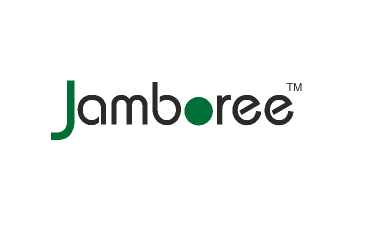

### _Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort._

### _They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college._

### _This feature estimates the chances of graduate admission from an Indian perspective._

## Aim of the Project:-

### _Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given                                                                           the rest of the variables._

## _Column Profiling:_

Serial No. (Unique row ID)

GRE Scores (out of 340)

TOEFL Scores (out of 120)

University Rating (out of 5)

Statement of Purpose and Letter of Recommendation Strength(SOP) (out of 5)

Research Experience (either 0 or 1)

Chance of Admit (ranging from 0 to 1)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import math
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing, svm
from statsmodels.formula.api import ols
import scipy as sp

In [2]:
url = 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv'
jamb = pd.read_csv(url)
jam_data = jamb.copy(deep=True)

In [3]:
jamb

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
# column and rows in the dataset
jamb.shape

(500, 9)

In [5]:
# Null values in the dataset
jamb.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
# unique values in the dataset
for col in jamb:
    print(f'Number of unique values in the {col} column:',jamb[col].nunique(),'.')

Number of unique values in the Serial No. column: 500 .
Number of unique values in the GRE Score column: 49 .
Number of unique values in the TOEFL Score column: 29 .
Number of unique values in the University Rating column: 5 .
Number of unique values in the SOP column: 9 .
Number of unique values in the LOR  column: 9 .
Number of unique values in the CGPA column: 184 .
Number of unique values in the Research column: 2 .
Number of unique values in the Chance of Admit  column: 61 .


In [7]:
# Duplicate values in the dataset
jamb.duplicated().sum()

0

In [8]:
jamb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [9]:
jamb.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


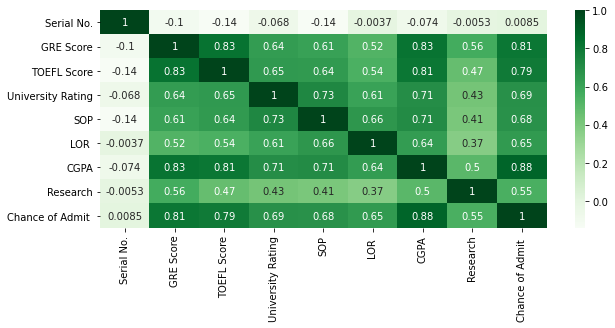

In [10]:
jamb_corr = jamb.corr()
plt.figure(figsize=(10,4))
sns.heatmap(jamb_corr,annot=True, cmap='Greens')
plt.show()

### *_Observations_*:-

    - GRE Score and TOEFL Scores shares a high correlation.
    - GRE Score and CGPA Scores shares a high correlation.
    - High correlation can be seen between Chance of Admit and GRE Score.
    - Strong correlation can be seen between CGPA and Chance of Admit.
    - High correlation can be seen between TOEFL and Chance of Admit.
    - High correlation can be seen between CGPA and TOEFL Score.
    - High correlation can be seen between University Rating and CGPA.
    - High correlation can be seen between University Rating and SOP.

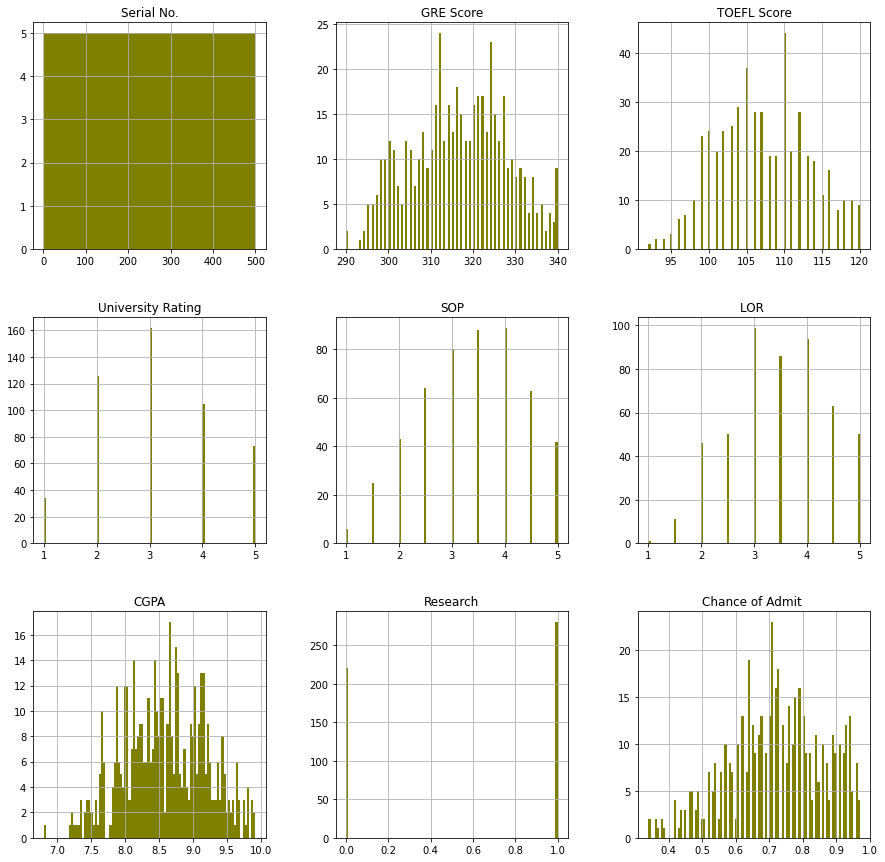

In [11]:
jamb.hist(color='olive',figsize=(15,15),bins=100)
plt.show()

Text(0.5, 1.0, 'Distribution of GRE Scores')

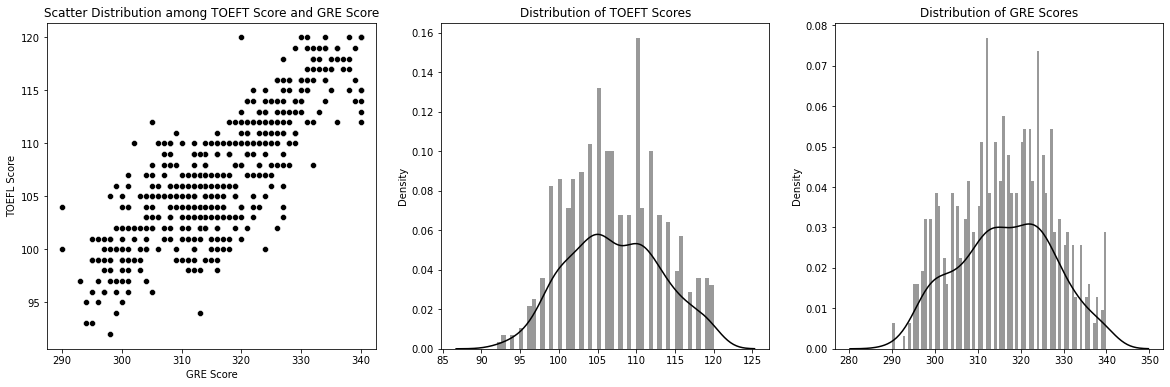

In [12]:
# graphs for toefl scores and gre scores
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(1,3,1)
sns.scatterplot(data=jamb,x='GRE Score',y='TOEFL Score',color='black')
plt.title('Scatter Distribution among TOEFT Score and GRE Score')

ax = fig.add_subplot(1,3,2)
sns.distplot(x=jamb['TOEFL Score'],color='black',bins=50)
plt.title('Distribution of TOEFT Scores')

ax = fig.add_subplot(1,3,3)
sns.distplot(x=jamb['GRE Score'],color='black',bins=80)
plt.title('Distribution of GRE Scores')


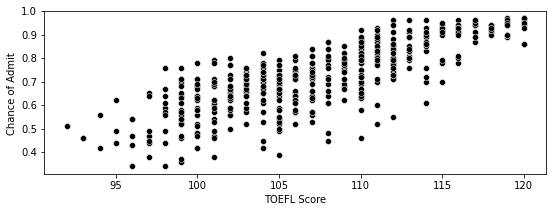

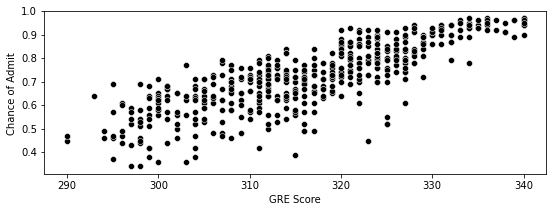

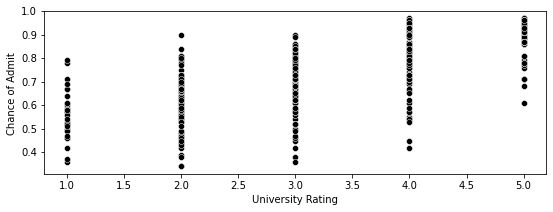

In [13]:
# graphs of multiple coulumn with chance of admit
col = jamb[['TOEFL Score','GRE Score','University Rating']]
for i in col:
    plt.figure(figsize=(9,3))
    plt.subplot(111)
    sns.scatterplot(jamb[i],jamb['Chance of Admit '],color = 'black')
    plt.show()


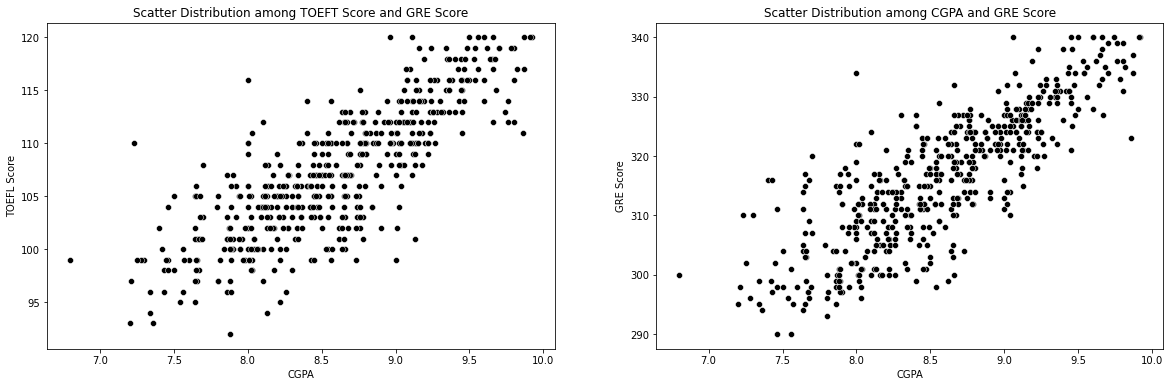

In [14]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(1,2,1)
sns.scatterplot(data=jamb,x='CGPA',y='TOEFL Score',color='black')
plt.title('Scatter Distribution among TOEFT Score and GRE Score')

ax = fig.add_subplot(1,2,2)
sns.scatterplot(x=jamb['CGPA'],y=jamb['GRE Score'],color='black')
plt.title('Scatter Distribution among CGPA and GRE Score')
plt.show()

# ``````````````````````````````````````Outlier Detection```````````````````````````````````````````

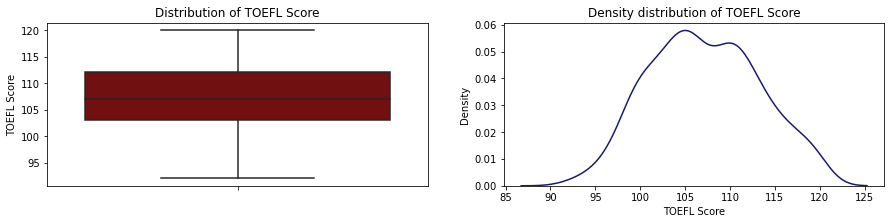

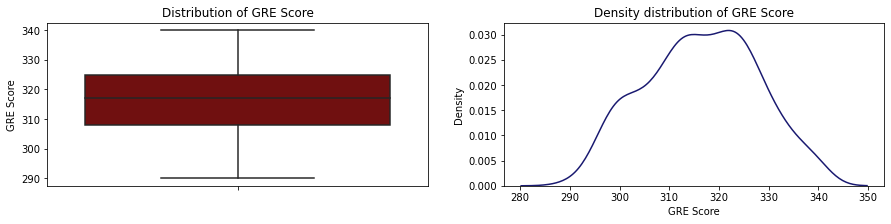

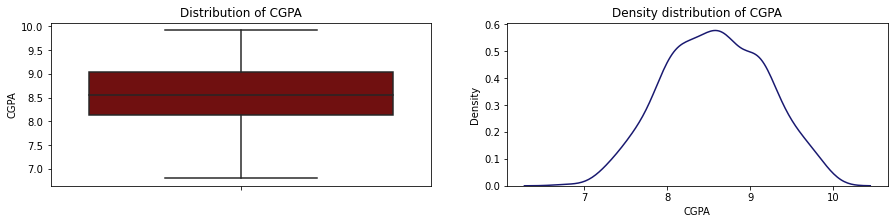

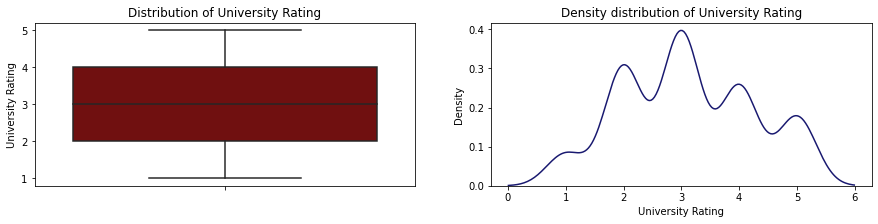

In [15]:
col = jamb[['TOEFL Score','GRE Score','CGPA','University Rating']]
for i in col:
    plt.figure(figsize=(15,3))
    plt.subplot(121)
    sns.boxplot(y=col[i], color='maroon');
    plt.title(f"Distribution of {i}");
    plt.subplot(122)
    sns.kdeplot(x=col[i],color='midnightblue');
    plt.title(f"Density distribution of {i}");

### Observations of the Violin plot:

   * No outliers can be seen in the dataset.
   * TOEFL Score and GRE Score shares the charactersitics of Gaussin Distribution.
   * CGPA depicts a Gaussin Distribution(in kde plot)


# ```````````````````````````````Exploratory Data Analysis```````````````````````````````````

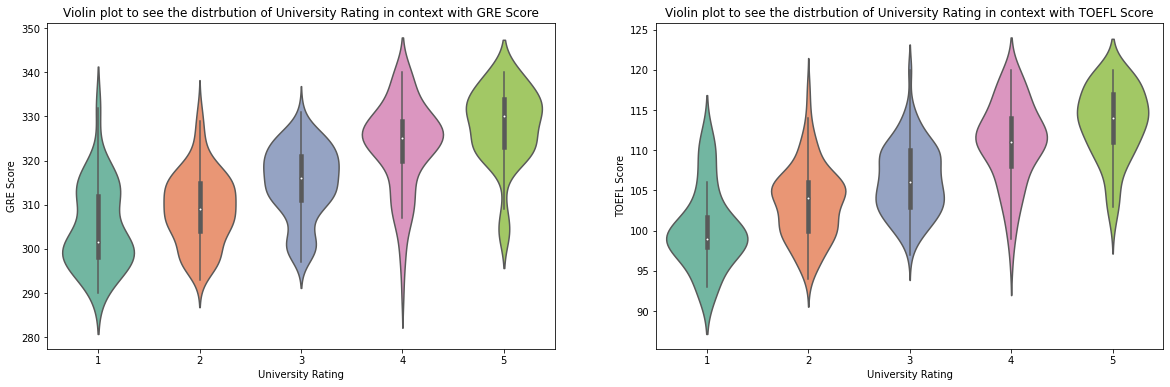

In [16]:
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(1,2,1)
sns.violinplot(x=jamb['University Rating'],y=jamb['GRE Score'],palette='Set2')
plt.title('Violin plot to see the distrbution of University Rating in context with GRE Score')

ax = fig.add_subplot(1,2,2)
sns.violinplot(x=jamb['University Rating'],y=jamb['TOEFL Score'],palette='Set2')
plt.title('Violin plot to see the distrbution of University Rating in context with TOEFL Score')
plt.show()

### Observations of the Violin plot:

   * As University Ratings increases, GRE scores increses.
   * As University Ratings increases, TOEFL scores increases.
   * The student who received maximum scores in GRE scores got University Rating as 4 and 5.
   * The student who received maximum scores in TOEFL scores got University Rating as 4 and 5
   

In [17]:
jamb.groupby(['University Rating'])[['GRE Score','TOEFL Score']].mean()

,GRE Score,TOEFL Score
University Rating,,
1,304.911765,100.205882
2,309.134921,103.444444
3,315.030864,106.314815
4,323.304762,110.961905
5,327.890411,113.438356


In [18]:
jamb.groupby(['University Rating'])[['GRE Score','TOEFL Score']].median()

,GRE Score,TOEFL Score
University Rating,,
1,301.5,99.0
2,309.0,104.0
3,316.0,106.0
4,325.0,111.0
5,330.0,114.0


In [19]:
jamb.groupby(['University Rating'])[['GRE Score','TOEFL Score']].count()

,GRE Score,TOEFL Score
University Rating,,
1,34,34
2,126,126
3,162,162
4,105,105
5,73,73


### Observations of the Violin plot:

   * Equal number of GRE and TOEFL students have received each University rating.
   * Small yet significant changes of the median can be seen in GRE students across different University Rating.
   * Small yet significant changes of the median can be seen in TOEFL students across different University Rating.
   * University Rating '4' given to both GRE and TOEFL scorers follows notibly same distribution.
   * Maximum marks scored by GRE students received University Rating as '4' and '5'.
   * Maximum marks scored by TOEFL students received University Rating as '4' and '5'.

In [20]:
pd.crosstab(jamb['Research'],jamb['University Rating'])

University Rating,1,2,3,4,5
Research,,,,,
0,24,89,75,23,9
1,10,37,87,82,64


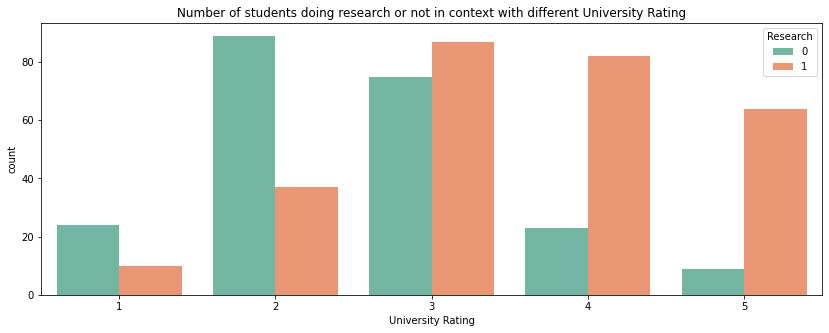

In [21]:
plt.figure(figsize=(14,5))
sns.countplot(x=jamb['University Rating'],hue=jamb['Research'],palette='Set2')
plt.title('Number of students doing research or not in context with different University Rating')
plt.show()

### Observations:

   * Maximum number of students doing research received a University Rating of 3.
   * University Ratings 1 and 2 only have more students doing Reseach than non-Researchers.
   * Non-Research increases till University Rating 3 and then declines.

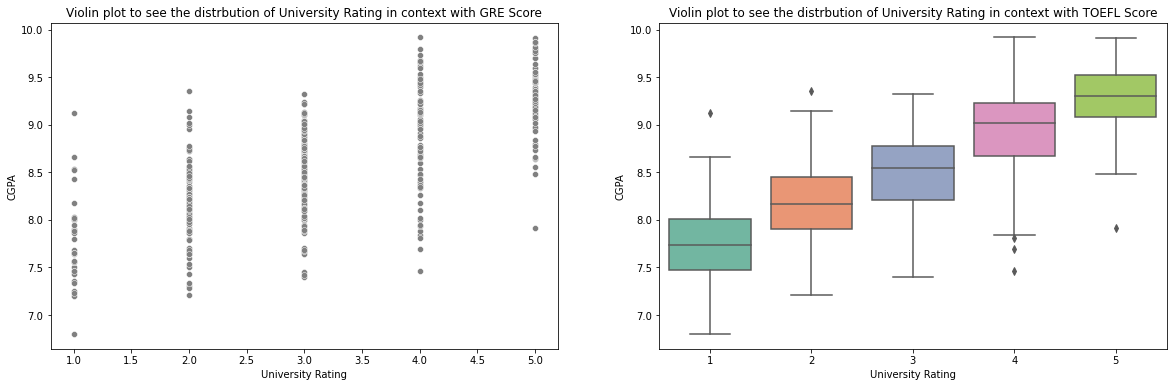

In [22]:

fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(1,2,1)
sns.scatterplot(x=jamb['University Rating'],y=jamb['CGPA'],color='grey')
plt.title('Violin plot to see the distrbution of University Rating in context with GRE Score')

ax = fig.add_subplot(1,2,2)
sns.boxplot(x=jamb['University Rating'],y=jamb['CGPA'],palette='Set2')
plt.title('Violin plot to see the distrbution of University Rating in context with TOEFL Score')
plt.show()

### Observations:

   * CGPA increases with University rating.
   * The median of CGPA increases as increase in University Rating.
   * Few outliers can be located.
   

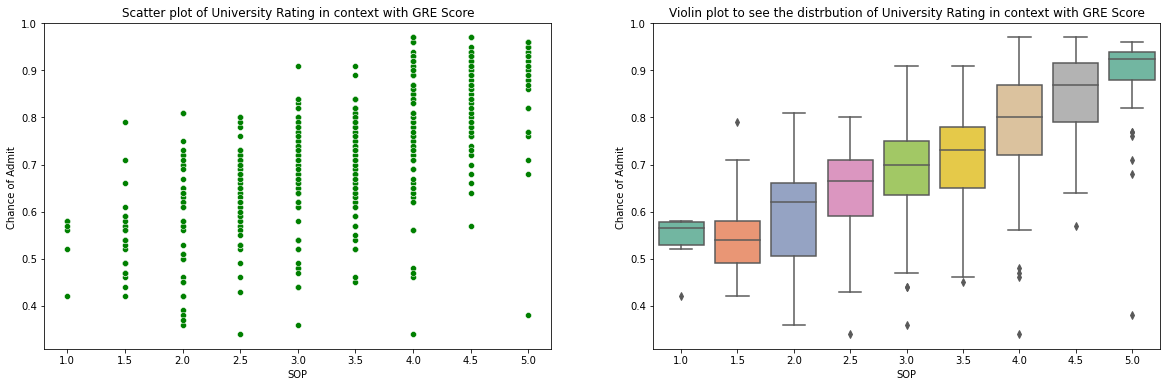

In [23]:

fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(1,2,1)
sns.scatterplot(x=jamb['SOP'],y=jamb['Chance of Admit '],color='green')
plt.title('Scatter plot of University Rating in context with GRE Score')

ax = fig.add_subplot(1,2,2)
sns.boxplot(x=jamb['SOP'],y=jamb['Chance of Admit '],palette='Set2')
plt.title('Violin plot to see the distrbution of University Rating in context with GRE Score')
plt.show()

### Observations:

   * Multiple Outliers can be noticed as the Chance of Admit increses with increase in SOP.

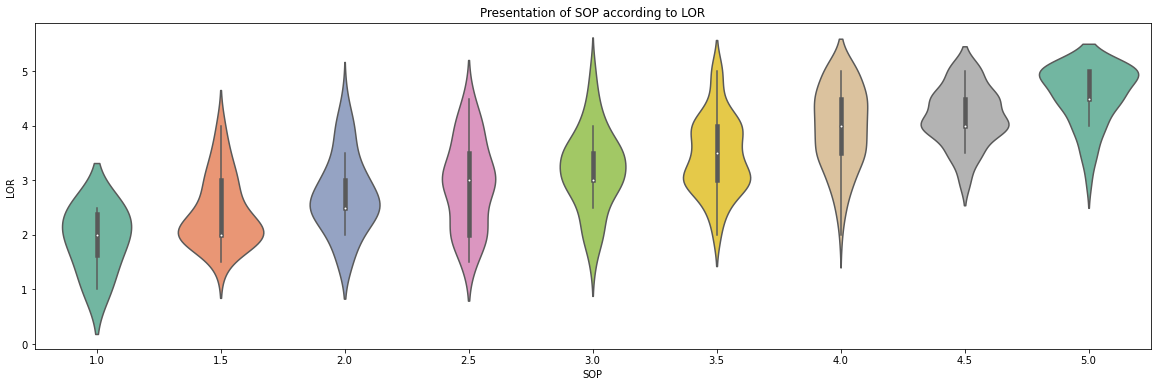

In [24]:
plt.figure(figsize=(20,6))
sns.violinplot(x=jamb['SOP'],y=jamb['LOR '],palette='Set2')
plt.title('Presentation of SOP according to LOR')
plt.show()

### Observations of the Violin plot:

   * LOR increases, SOP increases.

# ```````````````````````````````````````` Data Transformation ````````````````````````````````````````

In [25]:
jamb.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
# dropping series no. columns
jamb.drop(columns=['Serial No.'],inplace=True)

# renaming the columns
jamb.rename(columns={'GRE Score':'GRE_score','TOEFL Score':'TOEFL_score',
            'University Rating':'University_rating','LOR ':'LOR',
            'Chance of Admit ':'Chance_of_admit'},inplace=True)

# `````````````LINEAR REGRESSION`````````````

In [27]:
jamb.head()

,GRE_score,TOEFL_score,University_rating,SOP,LOR,CGPA,Research,Chance_of_admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## Linear regression - {y = (w1x1) + (w2x2) .......... (wnxn) + w0
#### x represents the dependent variables or target variables.
#### y represents the independent variable or predicted variable


In [4]:
x = jamb.drop(columns='Chance_of_admit')
y = jamb['Chance_of_admit']

In [5]:
# applyting StandartScaler on x 
scale = StandardScaler()
scale.fit(x)
x = scale.transform(x)

In [6]:
x_train,x_test,y_train,y_test= train_test_split(
                                            x,y,
                                            test_size=0.2
                                           )

In [7]:
# calling the linear regression function
li_reg = LinearRegression()
li_reg.fit(x_train,y_train)

LinearRegression()

In [8]:
print(f'The coefficient for linear regression: {li_reg.coef_}')
print()
print(f'The intercept for linear regression: {li_reg.intercept_}')

The coefficient for linear regression: [ 0.02849387  0.01885819  0.00533317 -0.00090897  0.0123537   0.07027567
  0.01106558]

The intercept for linear regression: 0.7222192484512774


###  Checking  MAE,  Score,  RSME,  R^2   and  Adjusted R^2 for Linear Regression

In [9]:
y_predict = li_reg.predict(x_test)

In [10]:

print('The score of Linear Regression for Training Data:',li_reg.score(x_train,y_train))
print()
print('The score of Linear Regression for Test Data:',li_reg.score(x_test,y_test))
print()
print('Mean Absolute error:',mean_absolute_error(y_true=y_test,y_pred=y_predict))       # defailt squared =True
print()
print('Root Mean Squared Error:',mean_squared_error(y_true=y_test,y_pred=y_predict,squared=False))
print()
print('R^2:',r2_score(y_test,y_predict))
print()
print('Adjusted R^2: ',(1 - (1-(r2_score(y_test,y_predict)))*(len(y)-1)/(len(y)-x.shape[1]-1)))
print()

The score of Linear Regression for Training Data: 0.8376783350087476

The score of Linear Regression for Test Data: 0.7460678331980412

Mean Absolute error: 0.05004200245735326

Root Mean Squared Error: 0.0698621388732628

R^2: 0.7460678331980412

Adjusted R^2:  0.742454977166306



{'0': 'GRE score', '1': 'TOEFL score', '2': 'University Rating', '3': 'SOP', '4': 'LOR', '5': 'CGPA', '6': 'Research'}


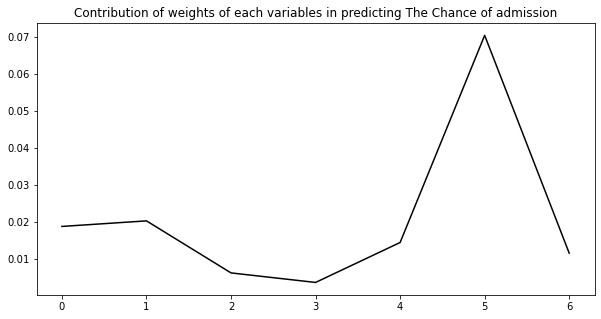

In [35]:
plt.figure(figsize=(10,5))
plt.plot(li_reg.coef_, color='black')
plt.title('Contribution of weights of each variables in predicting The Chance of admission')
print({'0':'GRE score','1':'TOEFL score','2':'University Rating','3':'SOP','4':'LOR','5':'CGPA','6':'Research'})
plt.show()

### Observations:

   * CGPA claims the highest Weightage in coeffieints among all variable during Linear Regression.

#  A. `REGULARIZATION(L2) - RIDGE REGRESSION`

### Ridge regression performs ‘L2 regularization‘, i.e. it adds a factor of sum of squares of coefficients in the optimization objective. Thus, ridge regression optimizes the following:
____________________________________________________________________________________
## Objective = RSS + α * (sum of square of coefficients)
____________________________________________________________________________________
### Here, α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients.



In [36]:
reg = Ridge(alpha=0)
reg.fit(x_train,y_train)
reg.coef_

array([0.01884328, 0.02034152, 0.00632144, 0.00375317, 0.01451829,
       0.07032104, 0.01163842])

if α = 0:
* The objective becomes same as simple linear regression.
* Coefficeints will be the same coefficients as simple linear regression
------------------------------------------------------------------------
________________________________________________________________________

In [37]:
reg = Ridge(alpha=1)
reg.fit(x_train,y_train)
reg.coef_

array([0.01908892, 0.02043032, 0.00643481, 0.00388837, 0.01456502,
       0.06965737, 0.01164252])

In [38]:
reg = Ridge(alpha=2)
reg.fit(x_train,y_train)
reg.coef_

array([0.0193235 , 0.02051666, 0.00654567, 0.00402053, 0.01460965,
       0.06901329, 0.01164717])

____________________________________________________________________________________
------------------------------------------------------------------------------------
if 0 < α < ∞:
* The magnitude of α will decide the weightage given to different parts of objective.
* The coefficients will be somewhere between 0 and ones for simple linear regression.

  Will work with aplha = 3
____________________________________________________________________________________
------------------------------------------------------------------------------------

In [39]:
reg = Ridge(alpha=3)
reg.fit(x_train,y_train)

Ridge(alpha=3)

In [40]:
print('Coefficients:',reg.coef_)
print()
print('Intercept:',reg.intercept_)

Coefficients: [0.01954764 0.02060062 0.00665411 0.00414977 0.01465229 0.06838788
 0.01165232]

Intercept: 0.7234715924772137


In [41]:
reg_pred = reg.predict(x_test)

###  Checking  MAE,  Score,  RSME,  R^2   and  Adjusted R^2 for Ridge Regression

In [42]:
print('The score of Ridge Regression for Training Data:',reg.score(x_train,y_train),'.')
print()
print('The score of Ridge Regression for Test Data:',reg.score(x_test,y_test),'.')
print()
print('Mean Absolute error:',mean_absolute_error(y_true=y_test,y_pred=reg_pred),'.')       # defailt squared =True
print()
print('Root Mean Squared Error:',mean_squared_error(y_true=y_test,y_pred=reg_pred,squared=False),'.')
print()
print('R^2:',r2_score(y_test,reg_pred),'.')
print()
print('Adjusted R^2: ',(1 - (1-(r2_score(y_test,reg_pred)))*(len(y)-1)/(len(y)-x.shape[1]-1)),'.')
print()

The score of Ridge Regression for Training Data: 0.8395933854758079 .

The score of Ridge Regression for Test Data: 0.753542439672923 .

Mean Absolute error: 0.048218693102499766 .

Root Mean Squared Error: 0.07202216514521062 .

R^2: 0.753542439672923 .

Adjusted R^2:  0.7500359296682695 .



{'0': 'GRE score', '1': 'TOEFL score', '2': 'University Rating', '3': 'SOP', '4': 'LOR', '5': 'CGPA', '6': 'Research'}


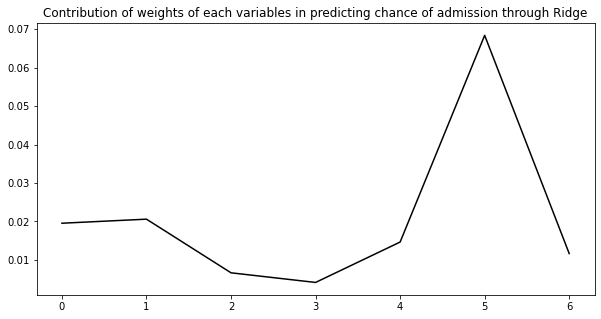

In [43]:
plt.figure(figsize=(10,5))
plt.plot(reg.coef_, color='black')
plt.title('Contribution of weights of each variables in predicting chance of admission through Ridge')
print({'0':'GRE score','1':'TOEFL score','2':'University Rating','3':'SOP','4':'LOR','5':'CGPA','6':'Research'})
plt.show()

### Observations:

   * CGPA claims the highest Weightage in coeffieints among all variable during Ridge Regression.

# B. `REGULARIZATION(L1) - LASSO REGRESSION`

### LASSO stands for Least Absolute Shrinkage and Selection Operator. I know it doesn’t give much of an idea but there are 2 key words here – ‘absolute‘ and ‘selection‘.

### Lasso regression performs L1 regularization, i.e. it adds a factor of sum of absolute value of coefficients in the optimization objective. Thus, lasso regression optimizes the following:

____________________________________________________________________________________
## Objective = RSS + α * (sum of absolute value of coefficients)
____________________________________________________________________________________

### Here, α (alpha) works similar to that of ridge and provides a trade-off between balancing RSS and magnitude of coefficients.

________________________________________________________________________
------------------------------------------------------------------------
if α = 0:

* Coefficeints will be the same coefficients as simple linear regression

if α = ∞: 

* All coefficients zero (same logic as before)

0 < α < ∞: 

* Coefficients between 0 and that of simple linear regression
________________________________________________________________________
------------------------------------------------------------------------

In [44]:
laso = Lasso(alpha=0.000001)
laso.fit(x_train,y_train)

Lasso(alpha=1e-06)

In [45]:
print('Coefficients:',laso.coef_)
print()
print('Intercept:',laso.intercept_)

Coefficients: [0.01884344 0.02034116 0.00632124 0.00375294 0.01451786 0.07032108
 0.01163781]

Intercept: 0.7234250177382294


In [46]:
laso_pred = laso.predict(x_test)

### Checking MAE, Score, RSME, R^2 and Adjusted R^2 for Lasso Regression


In [47]:
print('The score of Lasso Regression for Training Data:',laso.score(x_train,y_train),'.')
print()
print('The score of Lasso Regression for Test Data:',laso.score(x_test,y_test),'.')
print()
print('Mean Absolute error:',mean_absolute_error(y_true=y_test,y_pred=laso_pred),'.')       # defailt squared =True
print()
print('Root Mean Squared Error:',mean_squared_error(y_true=y_test,y_pred=laso_pred,squared=False),'.')
print()
print('R^2:',r2_score(y_test,laso_pred),'.')
print()
print('Adjusted R^2: ',(1 - (1-(r2_score(y_test,laso_pred)))*(len(y)-1)/(len(y)-x.shape[1]-1)),'.')
print()

The score of Lasso Regression for Training Data: 0.8396343957741417 .

The score of Lasso Regression for Test Data: 0.7538301510856829 .

Mean Absolute error: 0.048304267307499024 .

Root Mean Squared Error: 0.07198011399059905 .

R^2: 0.7538301510856829 .

Adjusted R^2:  0.7503277345360889 .



{'0': 'GRE score', '1': 'TOEFL score', '2': 'University Rating', '3': 'SOP', '4': 'LOR', '5': 'CGPA', '6': 'Research'}


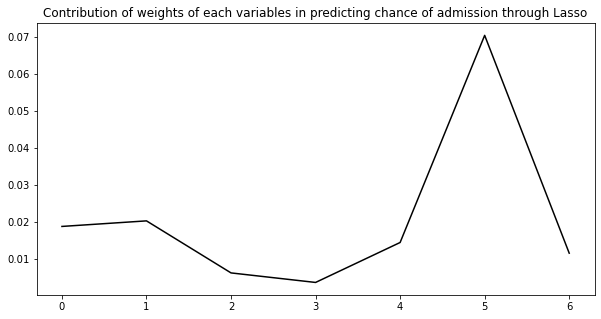

In [48]:
x_ticks = list(x)
y_ticks = list(laso.coef_)
plt.figure(figsize=(10,5))
plt.plot(laso.coef_, color='black')
plt.title('Contribution of weights of each variables in predicting chance of admission through Lasso')
print({'0':'GRE score','1':'TOEFL score','2':'University Rating','3':'SOP','4':'LOR','5':'CGPA','6':'Research'})
plt.show()

### Observations:

   * CGPA claims the highest Weightage in coeffieints among all variable during Lasso Regression.

# C. `ELASTIC NET `

### Elastic Net is a middle ground between Ridge Regression and Lasso Regression. 

### The regularization term is a simple mix of both Ridge and Lasso’s regularization terms,and you can control the mix ratio r. 

### When r = 0, Elastic Net is equivalent to Ridge Regression, and when r = 1, it is equivalent to Lasso Regression.

In [49]:
n = (0.00001,0.0001,0.001,0.01)
for i in range(len(n)):
    net = ElasticNet(alpha=i)
    net.fit(x_train,y_train)
    print('Coefficients:',net.coef_)
    print('Intercept:', net.intercept_)

Coefficients: [0.01884328 0.02034152 0.00632144 0.00375317 0.01451829 0.07032104
 0.01163842]
Intercept: 0.7234250426683245
Coefficients: [0. 0. 0. 0. 0. 0. 0.]
Intercept: 0.7219249999999999
Coefficients: [0. 0. 0. 0. 0. 0. 0.]
Intercept: 0.7219249999999999
Coefficients: [0. 0. 0. 0. 0. 0. 0.]
Intercept: 0.7219249999999999


### Taking alpha as 0.00001

In [50]:
net = ElasticNet(alpha=0.00001)
net.fit(x_train,y_train)
print('Coefficients:',net.coef_)
print('Intercept:', net.intercept_)

Coefficients: [0.01884378 0.02034002 0.0063205  0.00375228 0.01451635 0.07032045
 0.0116355 ]
Intercept: 0.7234249318006253


In [51]:
net_pred = net.predict(x_test)

### Checking MAE, Score, RSME, R^2 and Adjusted R^2 for Lasso Regression


In [52]:
print('The score of Lasso Regression for Training Data:',net.score(x_train,y_train),'.')
print()
print('The score of Lasso Regression for Test Data:',net.score(x_test,y_test),'.')
print()
print('Mean Absolute error:',mean_absolute_error(y_true=y_test,y_pred=net_pred),'.')       # defailt squared =True
print()
print('Root Mean Squared Error:',mean_squared_error(y_true=y_test,y_pred=net_pred,squared=False),'.')
print()
print('R^2:',r2_score(y_test,net_pred),'.')
print()
print('Adjusted R^2: ',(1 - (1-(r2_score(y_test,net_pred)))*(len(y)-1)/(len(y)-x.shape[1]-1)),'.')
print()

The score of Lasso Regression for Training Data: 0.8396343936925046 .

The score of Lasso Regression for Test Data: 0.7538308740167373 .

Mean Absolute error: 0.048304217655025204 .

Root Mean Squared Error: 0.07198000829792763 .

R^2: 0.7538308740167373 .

Adjusted R^2:  0.7503284677527478 .



# `LINEAR REGRESSION ASSUMPTIONS TESTING`

______________________________________________________________________________________
--------------------------------------------------------------------------------------
##### a) Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5) 
##### b) The mean of residuals is nearly zero
##### c) Linearity of variables (no pattern in the residual plot) 
##### d) Test for Homoscedasticity 
##### e) Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line) 
______________________________________________________________________________________
--------------------------------------------------------------------------------------



### a) Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5) 


In [53]:
x

array([[ 1.81923762,  1.77886545,  0.77558214, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.66714832, -0.03160087,  0.77558214, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-0.0418297 , -0.52536441, -0.09979274, ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.19888185,  2.10804114,  1.65095702, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.39631872, -0.68995225,  0.77558214, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.93301508,  0.95592621,  0.77558214, ...,  1.09894429,
         0.76721964, -1.12815215]])

In [54]:
col = jamb[['GRE_score', 'TOEFL_score', 'University_rating', 'SOP', 'LOR', 'CGPA','Research']]
x1 = np.array(x_train)
vif = []
for i in range(x1.shape[1]):
    vif.append(round(variance_inflation_factor(x1, i),2))
vif_score= pd.DataFrame({'Columns':['GRE_score', 'TOEFL_score', 'University_rating', 'SOP', 'LOR', 'CGPA','Research'],
                       'VIF score':vif})
    

##### Observation:-

    It can be observed that every column has a VIF less than 5.
    
##### Hense, there is no multicollinearity among the independent variables.

### b) The mean of residuals is nearly zero

In [55]:
normal = y_test - y_predict
print('Mean of Residuals:',(sum(np.array(normal)/len(normal))))

Mean of Residuals: -0.008425213341624471


### c) Linearity of variables (no pattern in the residual plot) 

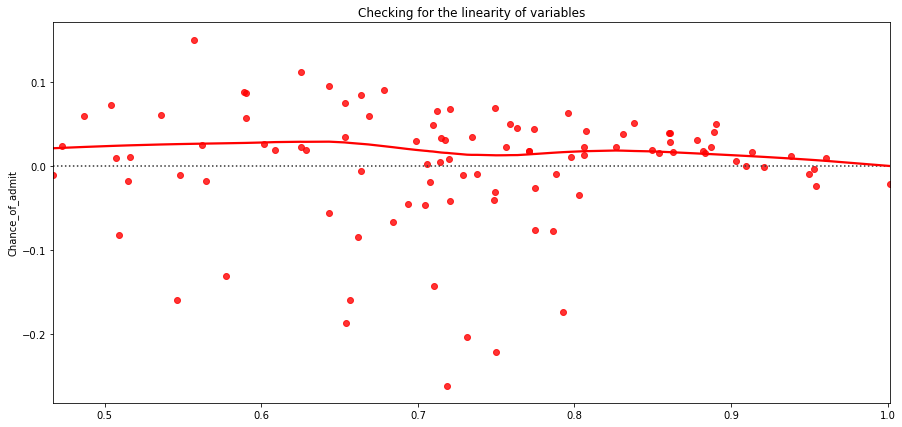

In [56]:
plt.figure(figsize=(15,7))
sns.residplot(x=y_predict,y=normal,lowess=True,color='red')
plt.title('Checking for the linearity of variables')
plt.show() 

### No linearity of Variable can be observed.

### d) Test for Homoscedasticity 

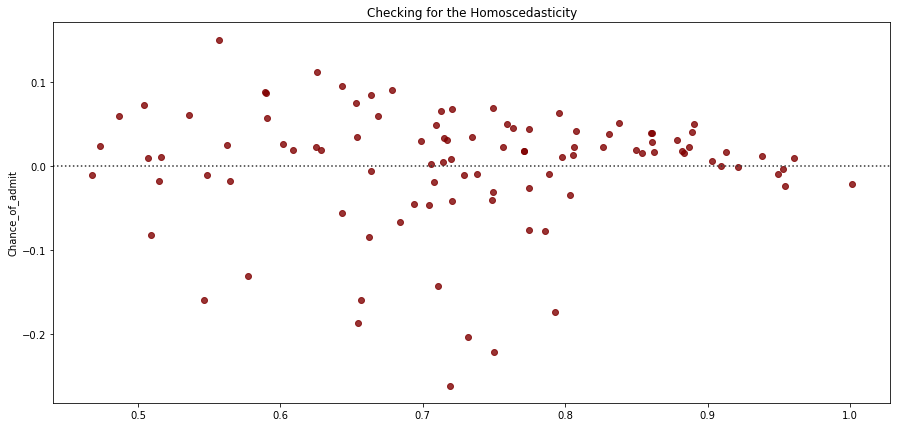

In [57]:
plt.figure(figsize=(15,7))
sns.residplot(x=y_predict,y=normal,color='maroon')
plt.title('Checking for the Homoscedasticity')
plt.show() 

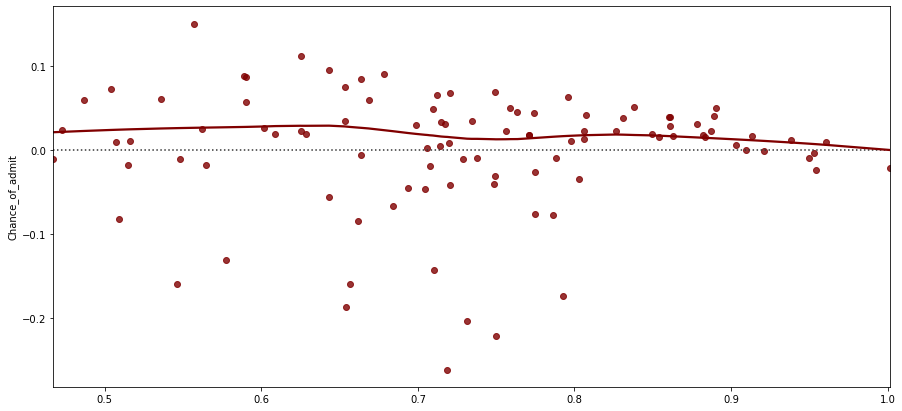

In [58]:
plt.figure(figsize=(15,7))
sns.residplot(x=y_predict,y=normal,lowess=True,color='maroon')
plt.show() 

### e) Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line) 

In [59]:
normal = y_test - y_predict
normal.head()

256    0.081677
313    0.079808
196    0.104395
188    0.039705
364    0.013832
Name: Chance_of_admit, dtype: float64

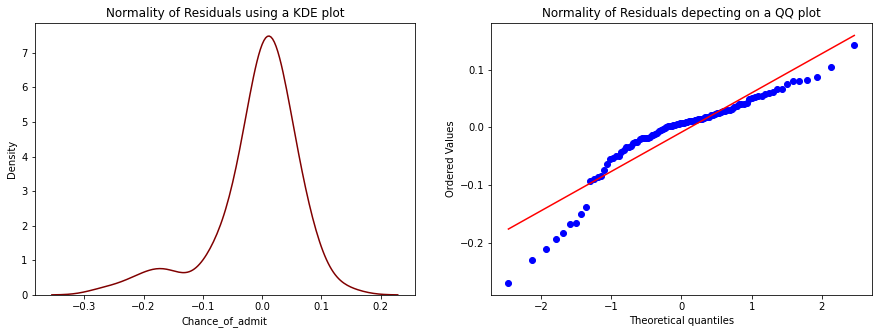

In [60]:
# qq-plot and kde plot of residuals
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
sns.kdeplot(x=normal,color='maroon')
plt.title('Normality of Residuals using a KDE plot')

ax = fig.add_subplot(1,2,2)
sp.stats.probplot(normal,plot=plt)
plt.title('Normality of Residuals depecting on a QQ plot')
plt.show()

# `INSIGHTS`


   * No outliers can be seen in the dataset.
   * TOEFL Score and GRE Score shares the charactersitics of Gaussin Distribution.
   * CGPA depicts a Gaussin Distribution(in kde plot)
   * GRE Score and TOEFL Scores shares a high correlation.
   * GRE Score and CGPA Scores shares a high correlation.
   * High correlation can be seen between Chance of Admit and GRE Score.
   * Strong correlation can be seen between CGPA and Chance of Admit.
   * High correlation can be seen between TOEFL and Chance of Admit.
   * High correlation can be seen between CGPA and TOEFL Score.
   * High correlation can be seen between University Rating and CGPA.
   * High correlation can be seen between University Rating and SOP.
   * CGPA increases with University rating.
   * The median of CGPA increases as increase in University Rating.
   * Few outliers can be located.
   * Maximum number of students doing research received a University Rating of 3.
   * University Ratings 1 and 2 only have more students doing Reseach than non-Researchers.
   * Non-Research increases till University Rating 3 and then declines.
   * Multiple Outliers can be noticed as the Chance of Admit increses with increase in SOP.

# `RECOMMENDATIONS`


   * Jamboree must focus on increasing the CGPA of students as it holds the maximum weitage in the model.
   * In order to get attain Top University Rating, Jamboree must revised the learning pattern of the insitute to gain better results than last year.
   * Jamboree should ask for feedbacks from students on a regular basis to improve.
   * GRE scores and TOEFL Scores plays a very important role in getting the Admission so the company must try to counsil students on why they must prepare for either one opf them or both of them.

# `SUBMITTED BY`
# `Noohi Naaz`